In [9]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [10]:
df.shape

(572, 5)

In [11]:
print("First five rows of the dataset")
df.head()

First five rows of the dataset


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [ ]:
df.columns = ['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales']

In [12]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

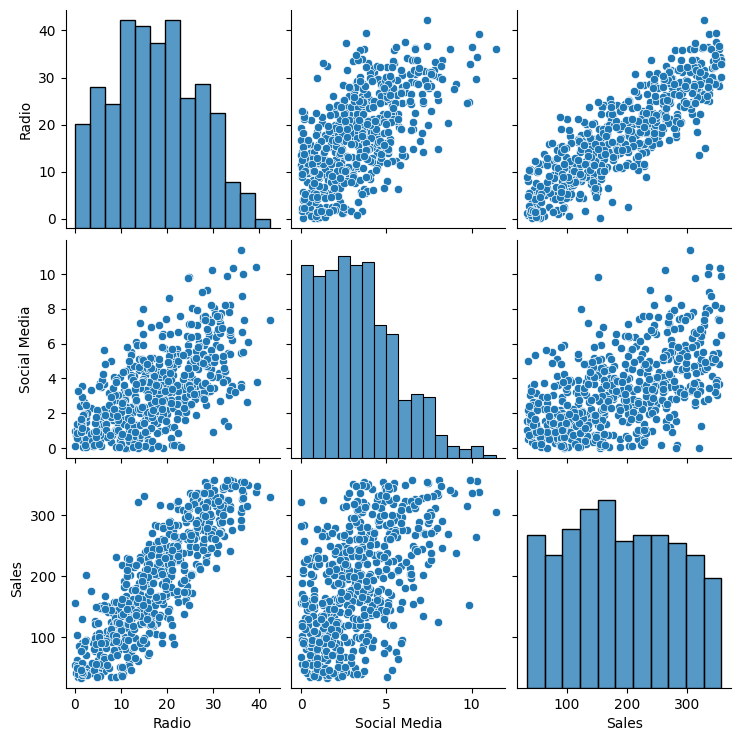

In [13]:
# Import necessary Libraries.

import seaborn as sns
import matplotlib.pyplot as plt

# Creat a pairplot of the continous variables

sns.pairplot(df)
plt.show()

In [14]:
# Drop rows with missing values
df = df.dropna()

# There is no categorical variables in this dataset, no further encoding is needed

In [15]:
# Check for missing values

print(df.isnull().sum())

# Display rows with missing values

print(df[df.isnull().any(axis=1)])


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64
Empty DataFrame
Columns: [TV, Radio, Social Media, Influencer, Sales]
Index: []


In [19]:
import statsmodels.formula.api as smf

# Define the OLS Formula
ols_formula = 'Sales ~ TV + Radio + Social_Media + Influencer'

# Fit the Model
model = smf.ols(formula=ols_formula, data=df).fit()

# Display the Model Summary
print(model.summary())


PatsyError: Error evaluating factor: NameError: name 'Social_Media' is not defined
    Sales ~ TV + Radio + Social_Media + Influencer
                         ^^^^^^^^^^^^

In [20]:
# Rename the column 'Social Media' to 'Social_Media'
df = df.rename(columns={'Social Media': 'Social_Media'})

In [21]:
import statsmodels.formula.api as smf

# Define the OLS Formula
ols_formula = 'Sales ~ TV + Radio + Social_Media + Influencer'

# Fit the Model
model = smf.ols(formula=ols_formula, data=df).fit()

# Display the Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        18:21:19   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

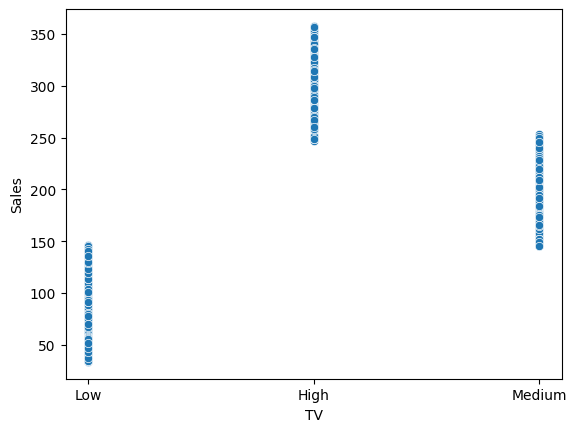

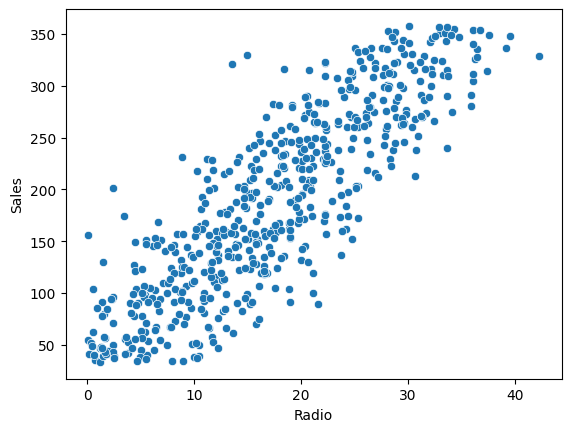

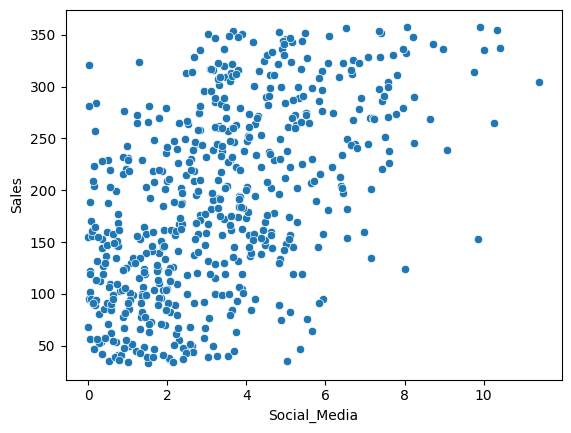

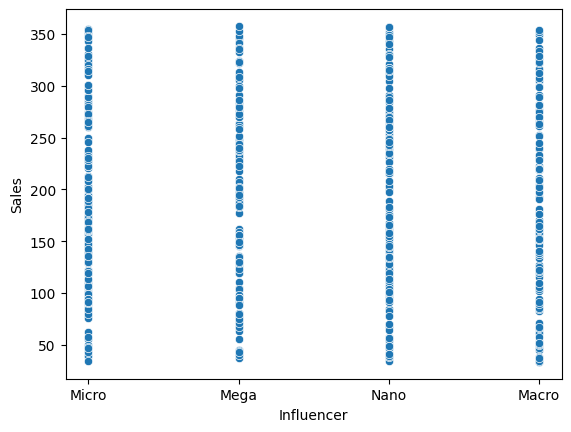

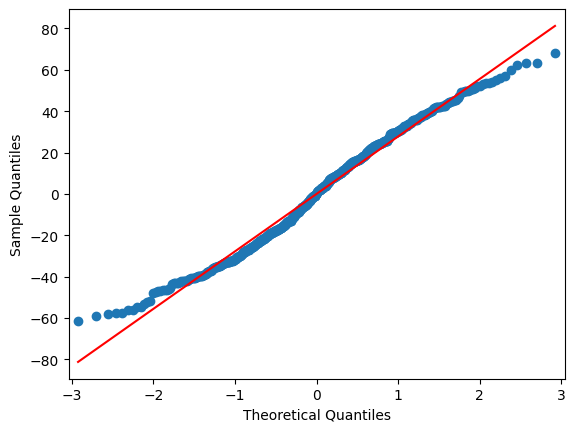

In [22]:
import statsmodels.api  as sm

# Create scatterplots for linearity
for col in ['TV', 'Radio', 'Social_Media', 'Influencer']:
    sns.scatterplot(x=col, y='Sales', data=df)
    plt.show()

# Calculate residuals and create a Q-Q plot
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.show()


In [23]:
# Display the model summary
print(model.summary())

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)
print("----------------------------------")
for col in ['Radio', 'TV[T.Low]', 'TV[T.Medium]', 'Influencer[T.Mega]', 'Influencer[T.Micro]', 'Influencer[T.Nano]', 'Social_Media',]:
      coef = model.params[col]
      p_value = model.pvalues[col]
      print(f"{col}:")
      print(f"  Coefficient: {coef:.4f}")
      print(f"  p-value:  {p_value:.4f}")
if p_value < 0.05:
      print(f" Statistically significant at the 5% level.")

else:
      print(f" Not statistically significant at the 5% level. ")

if coef > 0:
      print(f" A one unit increasr in {col} is associated with an increase of {coef:.4f} units in sales.")

elif coef < 0:
      print(f" A one unit increase in {col} is associated with a decrease of {coef:.4f} units in sales.")
      print("--------------------------------")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        19:11:19   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    